In [1]:

!pip install control


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 3.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
#import control as ct
import scipy
from scipy.integrate import odeint


##Parâmetros

In [3]:
# Dimensões do modelo
n = 5           # variáveis de estados
r = 1           # entradas
m = 1           # saídas
l = 0           # perturbações

#constantes
R=0.2
Ea=380
k_e=145000
b_e=2560
k_c=145000
b_c=2560
m_e=1000
m_c=900
K=50
g=9.81

##Sistema Linearizado

In [7]:
# Matrizes do Sistema Linearizado
A = np.array([[-(k_e + k_c)/(b_c+b_e), -k_e/(b_c*R + b_e*R), k_c/(b_c*R + b_e*R), -b_e/(b_c*R + b_e*R), b_c/(b_c*R + b_e*R)],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 0, 1],
              [-k_e*R/m_e, -k_e/m_e, 0, -b_e/m_e, 0],
              [k_c*R/m_c, 0, -k_c/m_c, 0, -b_c/m_c]])

B = np.array([[K/(R*R*(b_c+b_e))], [0], [0], [0], [0]])
C = np.array([[1, 1, 1, 0, 0]])
D = np.array([[0]])
E = np.array([[0], [0], [0], [0], [0]])
i = 0

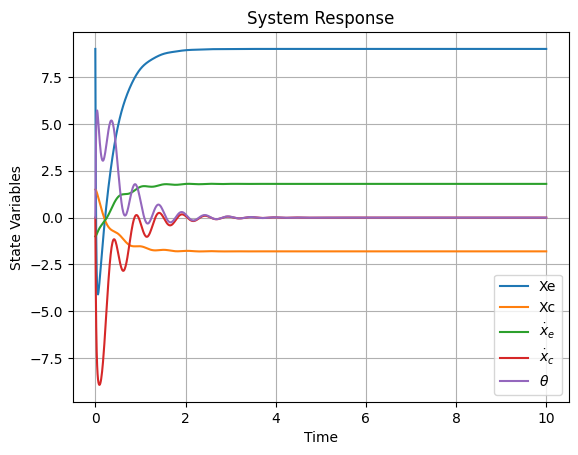

In [22]:
def system(x, t, A, B, u):
    return np.dot(A, x)
t = np.linspace(0, 10, 1000)
x0 = np.array([9, 1.5, -1, 0, 0])
def entrada(t):
  global i
  i = i + 1
  if t[i] <= 500:
    print(i)
    return 30
  else:
    print('b')
    return 0

x = odeint(system, x0, t, args=(A, B, entrada))

plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.title('System Response')
plt.legend(['Xe', 'Xc', '$\dot{x}_e$', '$\dot{x}_c$', '$\\theta$'])
plt.grid(True)
plt.show()